In [ ]:
# ---------------------------------------- #
# study notes:
# chapter 4 of aurelian geron's book
# Normal Equation
# ---------------------------------------- #

In [8]:
import numpy as np

X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1)

In [4]:
import seaborn as sns
sns.set()

<AxesSubplot:>

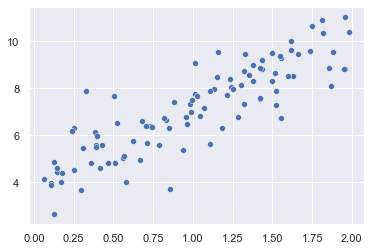

In [12]:
sns.scatterplot(x=X.reshape(1,-1)[0], y=y.reshape(1,-1)[0])

In [15]:
X_b = np.c_[np.ones((100,1)), X] # include a column of 1's in the X matrix
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)


In [16]:
theta_best

array([[4.05367115],
       [3.03875446]])

In [17]:
# make prediction using theta_best
X_new = np.array([[0], [2]]) # two points to make predictions
X_new_b = np.c_[np.ones((2,1)), X_new] # include 1's to the instace matrix
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.05367115],
       [10.13118007]])

In [18]:
import matplotlib.pyplot as plt

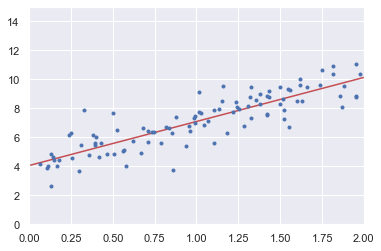

In [19]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0,2,0,15])
plt.show()

In [20]:
# performing linear regression with scikit-learn
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.05367115]), array([[3.03875446]]))

In [21]:
lin_reg.predict(X_new)

array([[ 4.05367115],
       [10.13118007]])

In [22]:
# under the hood
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.05367115],
       [3.03875446]])

In [23]:
# pseudoinverse, specifically Moore-Penrose inverse np.linalg.pinv()
np.linalg.pinv(X_b).dot(y)
# SVD stands for single value decomposition

array([[4.05367115],
       [3.03875446]])